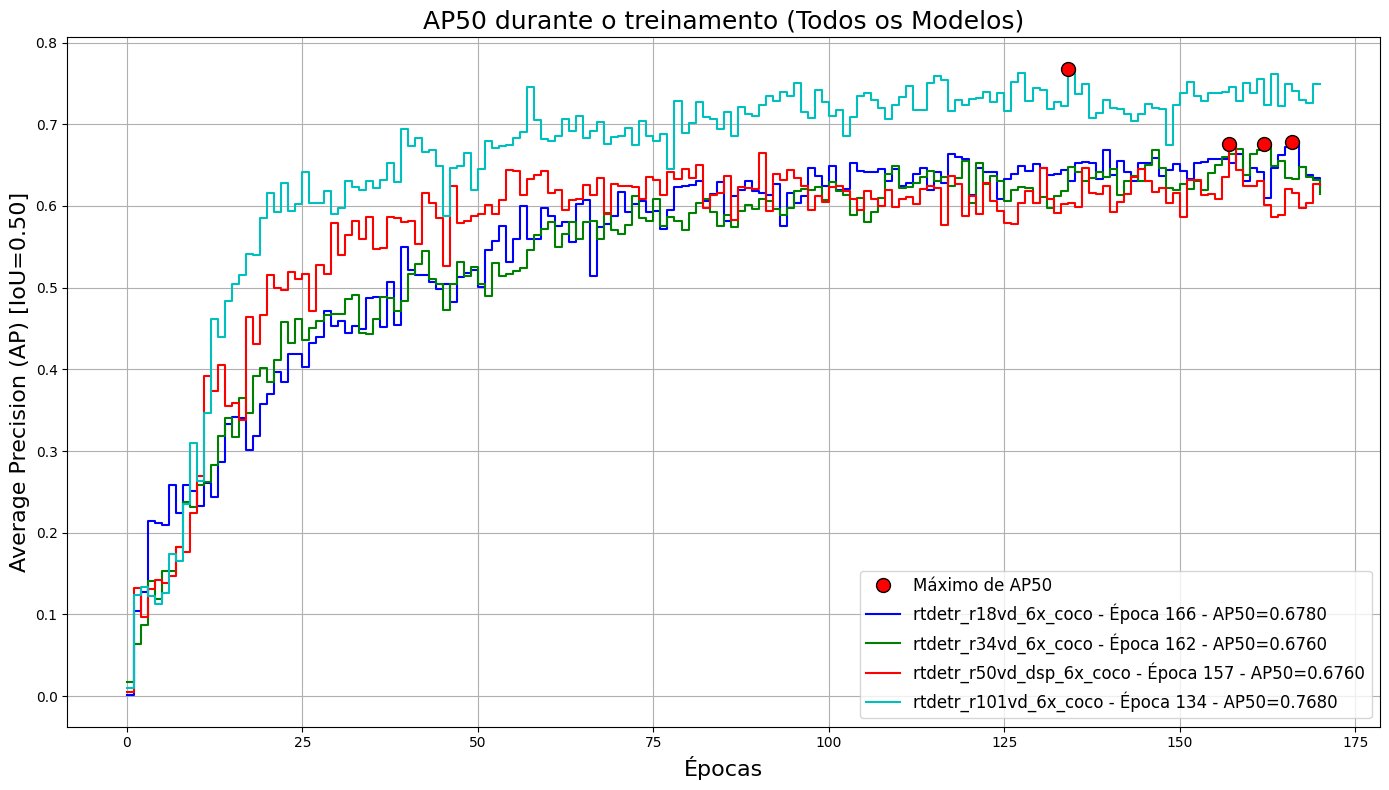

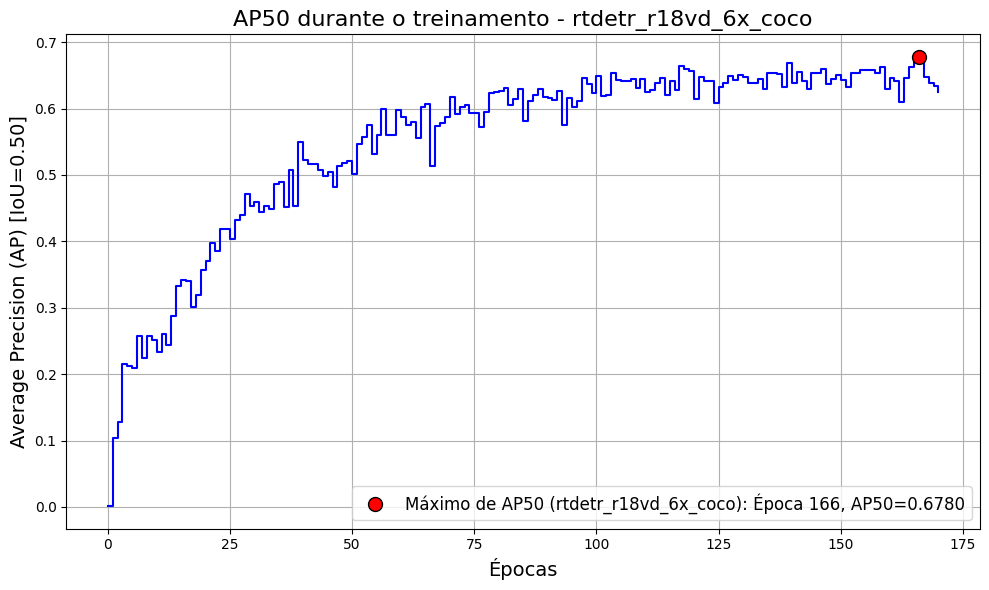

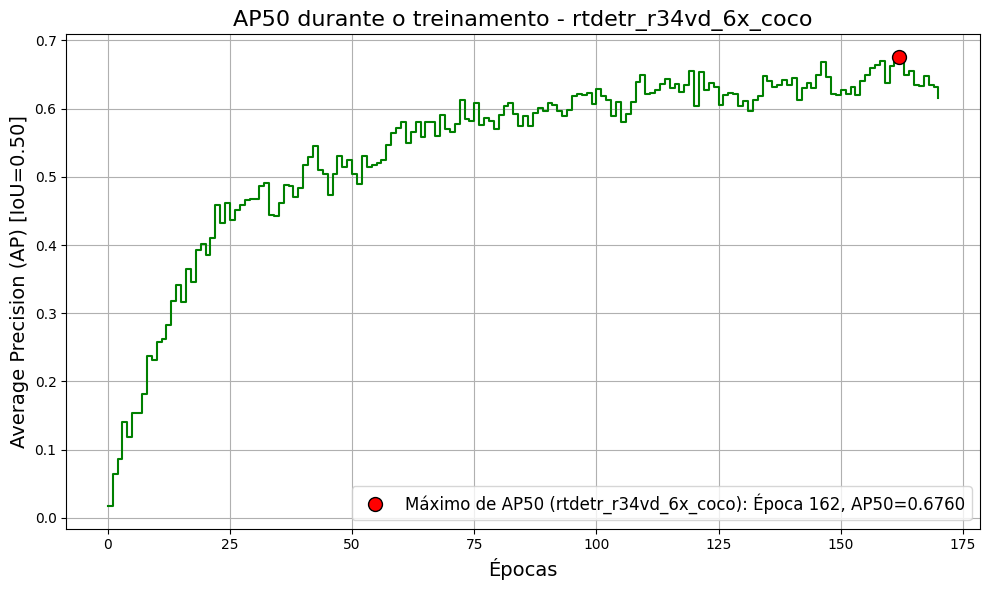

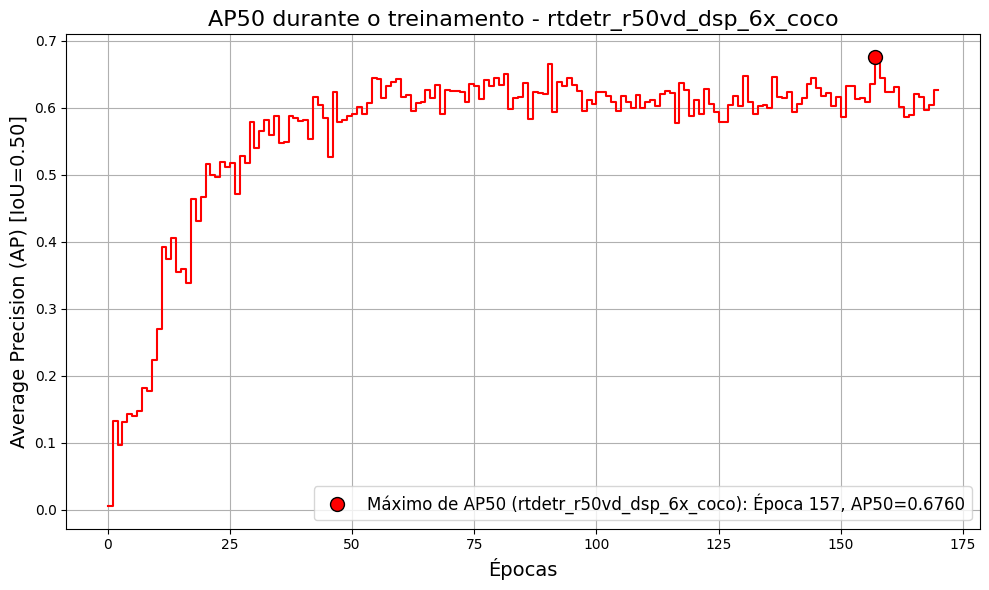

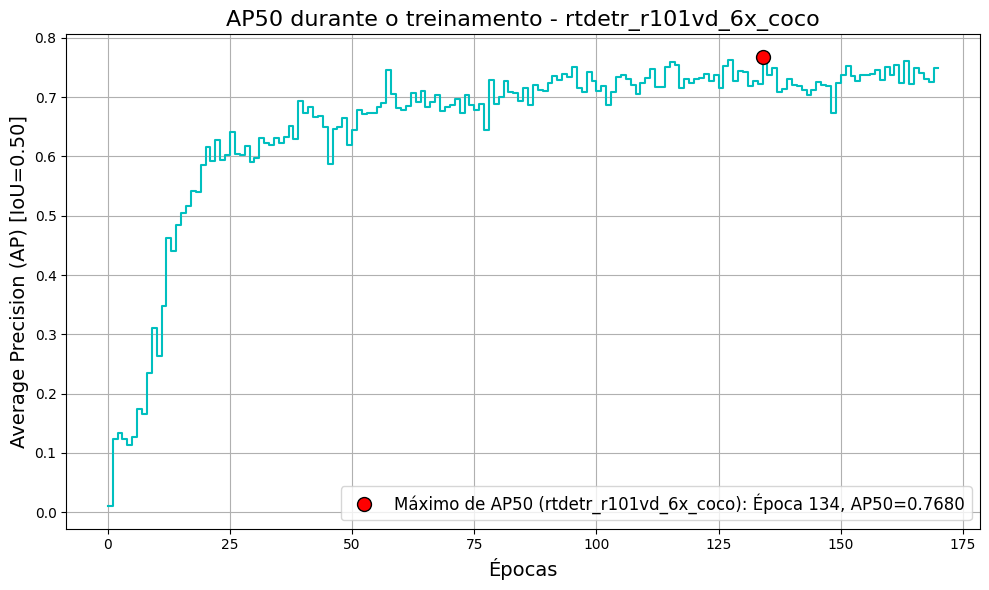

In [1]:
import re
import matplotlib.pyplot as plt

# Expressões regulares para identificar a linha de época e AP50
pattern_epoca = r"Epoch:\s*\[(\d+)\]"
pattern_ap50 = r"Average Precision\s+\(AP\)\s+@\[\s*IoU=0\.50\s*\|\s*area=\s+all\s*\|\s*maxDets=100\s*\]\s*=\s*([0-9.]+)"

# Função para extrair dados do arquivo de log
def extrair_dados_log(caminho_arquivo):
    epocas = []
    ap50_vals = []
    
    with open(caminho_arquivo, 'r') as arquivo:
        epoca_atual = None
        ap50_atual = None
        for linha in arquivo:
            match_epoca = re.search(pattern_epoca, linha)
            if match_epoca:
                if epoca_atual is not None and ap50_atual is not None:
                    epocas.append(epoca_atual)
                    ap50_vals.append(ap50_atual)
                epoca_atual = int(match_epoca.group(1))  
            
            match_ap50 = re.search(pattern_ap50, linha)
            if match_ap50:
                ap50_atual = float(match_ap50.group(1))
        
        if epoca_atual is not None and ap50_atual is not None:
            epocas.append(epoca_atual)
            ap50_vals.append(ap50_atual)

    return epocas, ap50_vals

# Função para gerar o gráfico combinado
def gerar_grafico(arquivos, nomes_modelos, max_epoca=170):
    cores = ['b', 'g', 'r', 'c']
    plt.figure(figsize=(14, 8))
    
    for i, caminho_arquivo in enumerate(arquivos):
        epocas, ap50_vals = extrair_dados_log(caminho_arquivo)
        epocas_limitadas = [epoca for epoca in epocas if epoca <= max_epoca]
        ap50_vals_limitados = [ap50_vals[j] for j in range(len(epocas)) if epocas[j] <= max_epoca]
        
        modelo_nome = nomes_modelos[i]
        max_ap50 = max(ap50_vals_limitados)
        epoca_max_ap50 = epocas_limitadas[ap50_vals_limitados.index(max_ap50)]
        
        plt.plot(epocas_limitadas, ap50_vals_limitados, color=cores[i], label=f'{modelo_nome} - Época {epoca_max_ap50} - AP50={max_ap50:.4f}')
        plt.scatter(epoca_max_ap50, max_ap50, color='red', s=100, zorder=5, edgecolors='black')

    # Adicionar a bolinha vermelha na legenda
    handles, labels = plt.gca().get_legend_handles_labels()
    red_dot = plt.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Máximo de AP50', markeredgecolor='black')
    handles = [red_dot] + handles
    labels = ['Máximo de AP50'] + labels
    plt.legend(handles, labels, loc='lower right', fontsize=12)

    plt.xlabel('Épocas', fontsize=16)
    plt.ylabel('Average Precision (AP) [IoU=0.50]', fontsize=16)
    plt.title('AP50 durante o treinamento (Todos os Modelos)', fontsize=18)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Função para gerar gráficos individuais para cada modelo
def gerar_graficos_individuais(arquivos, nomes_modelos, max_epoca=170):
    cores = ['b', 'g', 'r', 'c']
    
    for i, caminho_arquivo in enumerate(arquivos):
        epocas, ap50_vals = extrair_dados_log(caminho_arquivo)
        epocas_limitadas = [epoca for epoca in epocas if epoca <= max_epoca]
        ap50_vals_limitados = [ap50_vals[j] for j in range(len(epocas)) if epocas[j] <= max_epoca]
        
        modelo_nome = nomes_modelos[i]
        max_ap50 = max(ap50_vals_limitados)
        epoca_max_ap50 = epocas_limitadas[ap50_vals_limitados.index(max_ap50)]
        
        # Criar gráfico individual
        plt.figure(figsize=(10, 6))
        plt.plot(epocas_limitadas, ap50_vals_limitados, color=cores[i], label=f'{modelo_nome}')
        plt.scatter(epoca_max_ap50, max_ap50, color='red', s=100, zorder=5, edgecolors='black')

        # Adicionar a legenda para bolinha vermelha e modelo
        red_dot = plt.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label=f'Máximo de AP50 ({modelo_nome}): Época {epoca_max_ap50}, AP50={max_ap50:.4f}', markeredgecolor='black')
        plt.legend(handles=[red_dot], labels=[f'Máximo de AP50 ({modelo_nome}): Época {epoca_max_ap50}, AP50={max_ap50:.4f}'], loc='lower right', fontsize=12)
        
        plt.xlabel('Épocas', fontsize=14)
        plt.ylabel('Average Precision (AP) [IoU=0.50]', fontsize=14)
        plt.title(f'AP50 durante o treinamento - {modelo_nome}', fontsize=16)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Lista de arquivos e nomes dos modelos
arquivos = [
    r"D:\Projeto_MESTRADO\DÍBIO_RESULTADOS\rtdetr_r18vd_6x_coco\rtdetr_r18vd_6x_coco.txt",
    r"D:\Projeto_MESTRADO\DÍBIO_RESULTADOS\rtdetr_r34vd_6x_coco\rtdetr_r34vd_6x_coco.txt",
    r"D:\Projeto_MESTRADO\DÍBIO_RESULTADOS\rtdetr_r50vd_dsp_6x_coco\Projeto_FINAL_r50vd_dsp_6x_coco.yml.(deucerto)ipynb.txt",
    r"D:\Projeto_MESTRADO\DÍBIO_RESULTADOS\rtdetr_r101vd_6x_coco\rtdetr_r101vd_6x_coco.txt"
]

# Nomes dos modelos para as legendas
nomes_modelos = [
    'rtdetr_r18vd_6x_coco',
    'rtdetr_r34vd_6x_coco',
    'rtdetr_r50vd_dsp_6x_coco',
    'rtdetr_r101vd_6x_coco'
]

# Gerar o gráfico combinado
gerar_grafico(arquivos, nomes_modelos, max_epoca=170)

# Gerar gráficos individuais
gerar_graficos_individuais(arquivos, nomes_modelos, max_epoca=170)


In [4]:
import re
import pandas as pd

# Expressões regulares para identificar a linha de época e AP50
pattern_epoca = r"Epoch:\s*\[(\d+)\]"
pattern_ap50 = r"Average Precision\s+\(AP\)\s+@\[\s*IoU=0\.50\s*\|\s*area=\s+all\s*\|\s*maxDets=100\s*\]\s*=\s*([0-9.]+)"

# Função para extrair dados do arquivo de log
def extrair_dados_log(caminho_arquivo):
    epocas = []
    ap50_vals = []
    
    # Abrir o arquivo de log
    with open(caminho_arquivo, 'r') as arquivo:
        epoca_atual = None
        ap50_atual = None
        for linha in arquivo:
            # Verificar se a linha contém o número da época
            match_epoca = re.search(pattern_epoca, linha)
            if match_epoca:
                # Se já houver um valor de AP50 registrado, salvamos a época anterior com seu AP50
                if epoca_atual is not None and ap50_atual is not None:
                    epocas.append(epoca_atual)
                    ap50_vals.append(ap50_atual)
                
                # Atualiza a época
                epoca_atual = int(match_epoca.group(1))  
            
            # Verificar se a linha contém o valor de AP50
            match_ap50 = re.search(pattern_ap50, linha)
            if match_ap50:
                # Atualiza o valor de AP50 para a última época encontrada
                ap50_atual = float(match_ap50.group(1))
        
        # Garantir que a última época e seu AP50 também sejam adicionados
        if epoca_atual is not None and ap50_atual is not None:
            epocas.append(epoca_atual)
            ap50_vals.append(ap50_atual)

    return epocas, ap50_vals

# Função para calcular o AP50 para cada modelo e gerar a tabela
def gerar_tabela_ap50(arquivos, nomes_modelos):
    # Criar uma lista para armazenar os dados dos modelos
    dados_tabela = []
    
    for i, caminho_arquivo in enumerate(arquivos):
        # Extrair os dados do log
        epocas, ap50_vals = extrair_dados_log(caminho_arquivo)
        
        # Nome do modelo
        modelo_nome = nomes_modelos[i]
        
        # AP50_val: o valor máximo de AP50
        ap50_val = max(ap50_vals) if ap50_vals else None
        
        # AP50_teste: o valor de AP50 na última época
        ap50_teste = ap50_vals[-1] if ap50_vals else None  # Considera o último valor de AP50
        
        # Adicionar os dados à lista
        dados_tabela.append([modelo_nome, ap50_val, ap50_teste])
    
    # Criar um DataFrame para exibir os dados em formato de tabela
    df = pd.DataFrame(dados_tabela, columns=["Modelo", "AP50_validação", "AP50_teste"])
    
    return df

# Lista de arquivos e nomes dos modelos
arquivos = [
    r"D:\Projeto_MESTRADO\DÍBIO_RESULTADOS\rtdetr_r18vd_6x_coco\rtdetr_r18vd_6x_coco.txt",
    r"D:\Projeto_MESTRADO\DÍBIO_RESULTADOS\rtdetr_r34vd_6x_coco\rtdetr_r34vd_6x_coco.txt",
    r"D:\Projeto_MESTRADO\DÍBIO_RESULTADOS\rtdetr_r50vd_dsp_6x_coco\Projeto_FINAL_r50vd_dsp_6x_coco.yml.(deucerto)ipynb.txt",
    r"D:\Projeto_MESTRADO\DÍBIO_RESULTADOS\rtdetr_r101vd_6x_coco\rtdetr_r101vd_6x_coco.txt"
]

# Nomes dos modelos para as legendas
nomes_modelos = [
    'rtdetr_r18vd_6x_coco',
    'rtdetr_r34vd_6x_coco',
    'rtdetr_r50vd_dsp_6x_coco',
    'rtdetr_r101vd_6x_coco'
]

# Gerar a tabela com os valores de AP50
tabela_ap50 = gerar_tabela_ap50(arquivos, nomes_modelos)

# Exibir a tabela
print(tabela_ap50)


                     Modelo  AP50_validação  AP50_teste
0      rtdetr_r18vd_6x_coco           0.678       0.658
1      rtdetr_r34vd_6x_coco           0.676       0.623
2  rtdetr_r50vd_dsp_6x_coco           0.676       0.620
3     rtdetr_r101vd_6x_coco           0.768       0.749


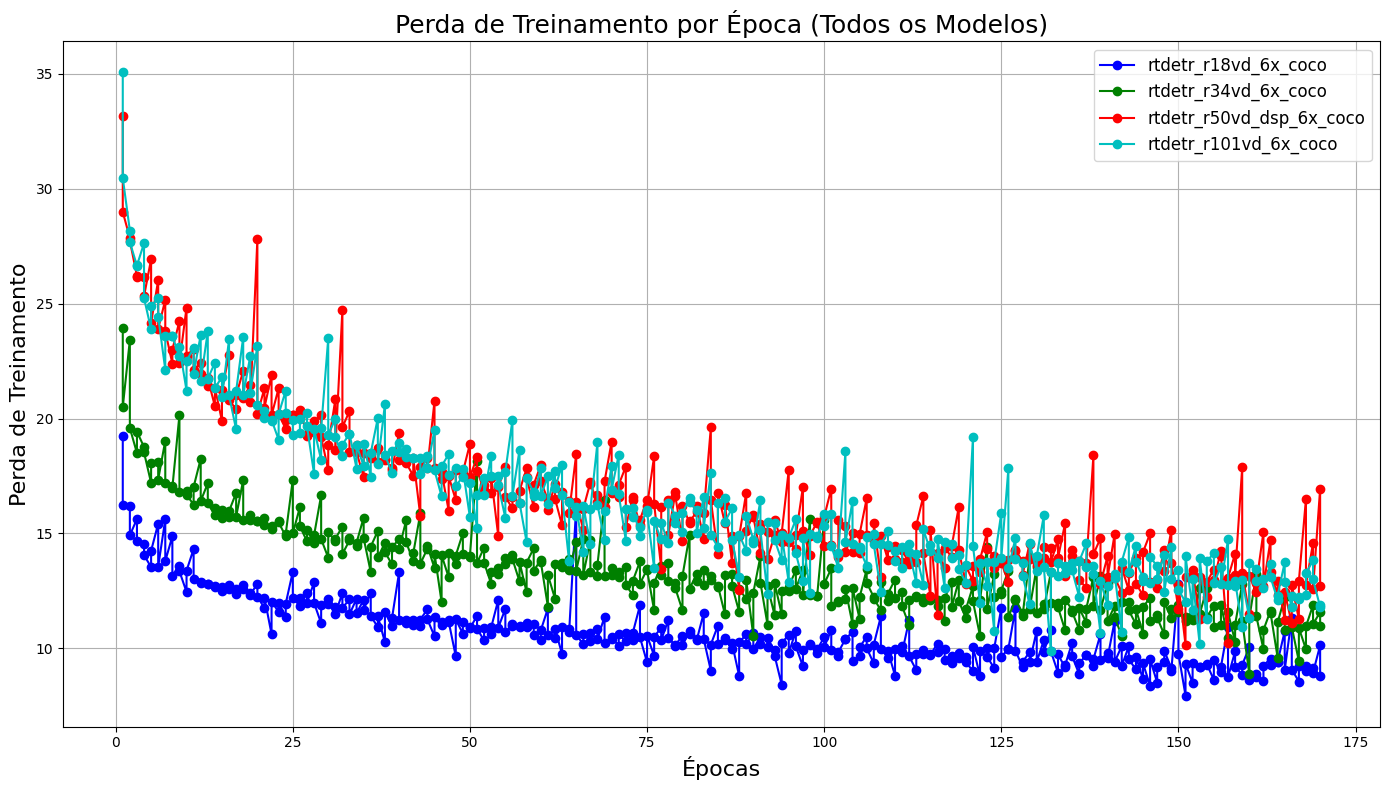

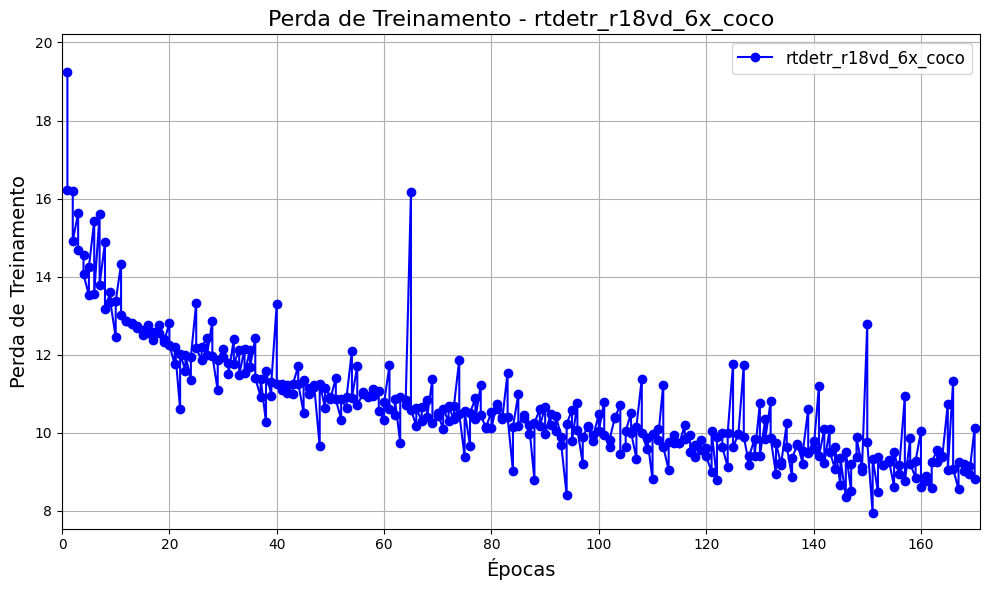

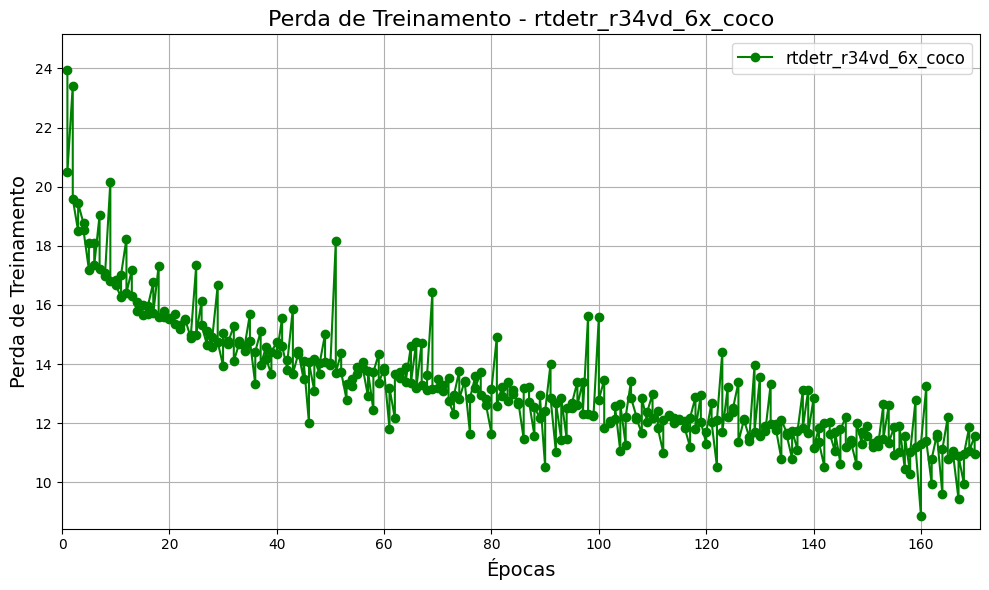

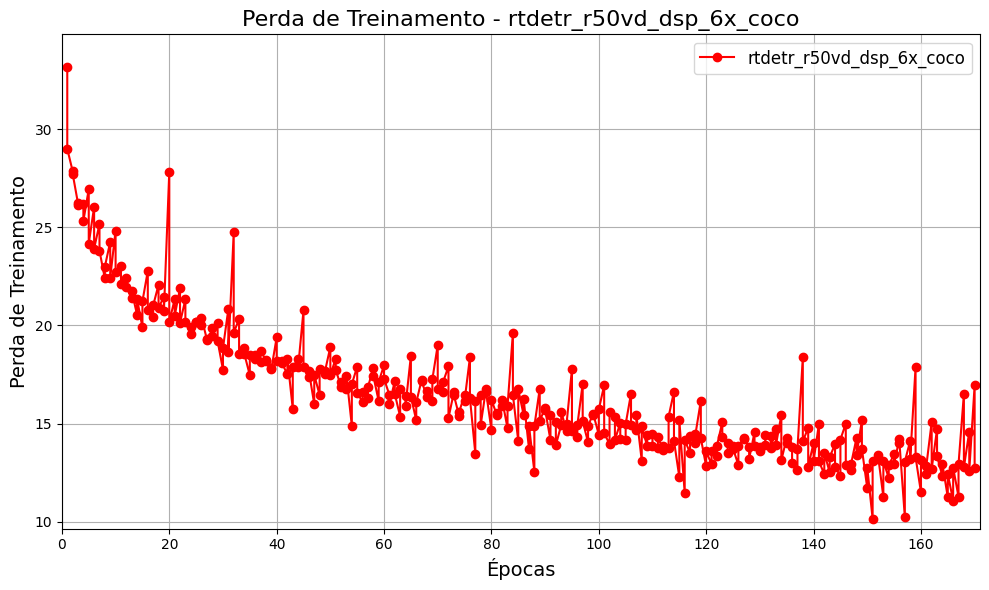

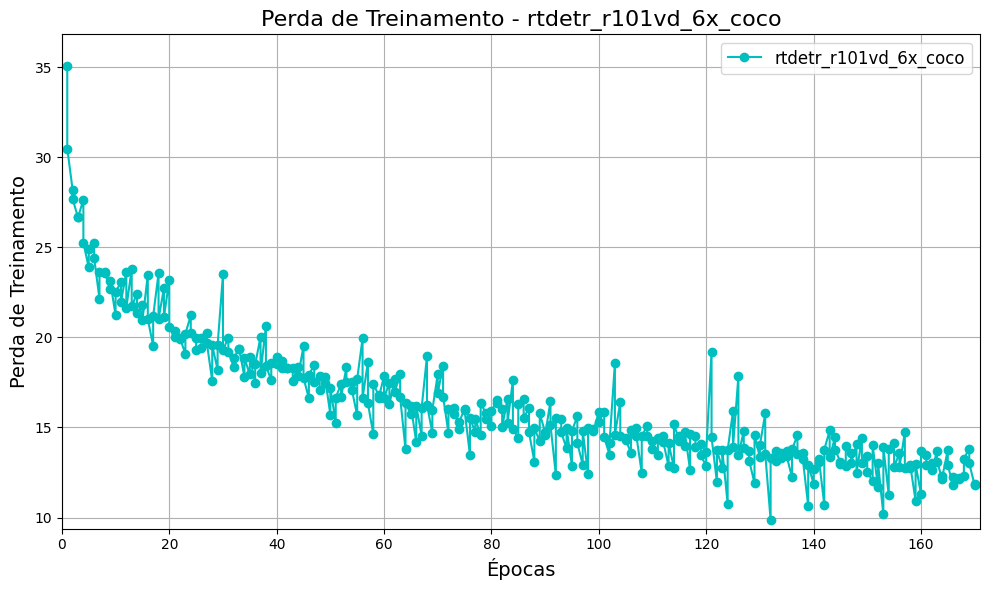

In [10]:
import re
import matplotlib.pyplot as plt

# Função para processar cada arquivo de log e extrair épocas e perdas
def processar_arquivo(caminho_arquivo):
    epocas = []
    perdas = []
    
    # Regex para capturar os valores de época e perda média
    regex = r"Epoch: \[(\d+)\].*loss: ([\d\.]+)"
    
    with open(caminho_arquivo, "r") as arquivo:
        for linha in arquivo:
            match = re.search(regex, linha)
            if match:
                epoca = int(match.group(1)) + 1  # Converter de índice 0-based para 1-based
                perda = float(match.group(2))
                epocas.append(epoca)
                perdas.append(perda)
    
    return epocas, perdas

# Função para gerar o gráfico com todos os modelos juntos
def gerar_grafico_todos_juntos(arquivos, nomes_modelos, max_epoca=170):
    cores = ['b', 'g', 'r', 'c']  # Cores para os diferentes modelos
    plt.figure(figsize=(14, 8))
    
    for i, caminho_arquivo in enumerate(arquivos):
        epocas, perdas = processar_arquivo(caminho_arquivo)
        
        # Filtrar até a época máxima
        epocas_limitadas = [epoca for epoca in epocas if epoca <= max_epoca]
        perdas_limitadas = [perdas[j] for j in range(len(epocas)) if epocas[j] <= max_epoca]
        
        modelo_nome = nomes_modelos[i]
        plt.plot(epocas_limitadas, perdas_limitadas, color=cores[i], label=f'{modelo_nome}', marker='o')

    plt.xlabel('Épocas', fontsize=16)
    plt.ylabel('Perda de Treinamento', fontsize=16)
    plt.title('Perda de Treinamento por Época (Todos os Modelos)', fontsize=18)
    plt.grid(True)
    plt.legend(loc='upper right', fontsize=12)
    plt.tight_layout()
    plt.show()

# Função para gerar gráficos individuais
def gerar_graficos_individuais(arquivos, nomes_modelos, max_epoca=170):
    cores = ['b', 'g', 'r', 'c']
    
    for i, caminho_arquivo in enumerate(arquivos):
        epocas, perdas = processar_arquivo(caminho_arquivo)
        
        # Filtrar até a época máxima
        epocas_limitadas = [epoca for epoca in epocas if epoca <= max_epoca]
        perdas_limitadas = [perdas[j] for j in range(len(epocas)) if epocas[j] <= max_epoca]
        
        modelo_nome = nomes_modelos[i]
        
        # Criar gráfico individual
        plt.figure(figsize=(10, 6))
        plt.plot(epocas_limitadas, perdas_limitadas, color=cores[i], label=f'{modelo_nome}', marker='o')
        plt.xlabel('Épocas', fontsize=14)
        plt.ylabel('Perda de Treinamento', fontsize=14)
        plt.title(f'Perda de Treinamento - {modelo_nome}', fontsize=16)
        plt.grid(True)
        plt.legend(loc='upper right', fontsize=12)
        plt.tight_layout()
        plt.ylim(min(perdas_limitadas) * 0.95, max(perdas_limitadas) * 1.05)  # Ajustar o zoom semelhante ao gráfico geral
        plt.xlim(0, max_epoca + 1)  # Garantir que o eixo X inclua todas as épocas
        plt.show()

# Lista de arquivos e nomes dos modelos
arquivos = [
    r"D:\Projeto_MESTRADO\DÍBIO_RESULTADOS\rtdetr_r18vd_6x_coco\rtdetr_r18vd_6x_coco.txt",
    r"D:\Projeto_MESTRADO\DÍBIO_RESULTADOS\rtdetr_r34vd_6x_coco\rtdetr_r34vd_6x_coco.txt",
    r"D:\Projeto_MESTRADO\DÍBIO_RESULTADOS\rtdetr_r50vd_dsp_6x_coco\Projeto_FINAL_r50vd_dsp_6x_coco.yml.(deucerto)ipynb.txt",
    r"D:\Projeto_MESTRADO\DÍBIO_RESULTADOS\rtdetr_r101vd_6x_coco\rtdetr_r101vd_6x_coco.txt"
]

# Nomes dos modelos para as legendas
nomes_modelos = [
    'rtdetr_r18vd_6x_coco',
    'rtdetr_r34vd_6x_coco',
    'rtdetr_r50vd_dsp_6x_coco',
    'rtdetr_r101vd_6x_coco'
]

# Gerar o gráfico com todos os modelos juntos
gerar_grafico_todos_juntos(arquivos, nomes_modelos, max_epoca=170)

# Gerar gráficos individuais para cada modelo
gerar_graficos_individuais(arquivos, nomes_modelos, max_epoca=170)


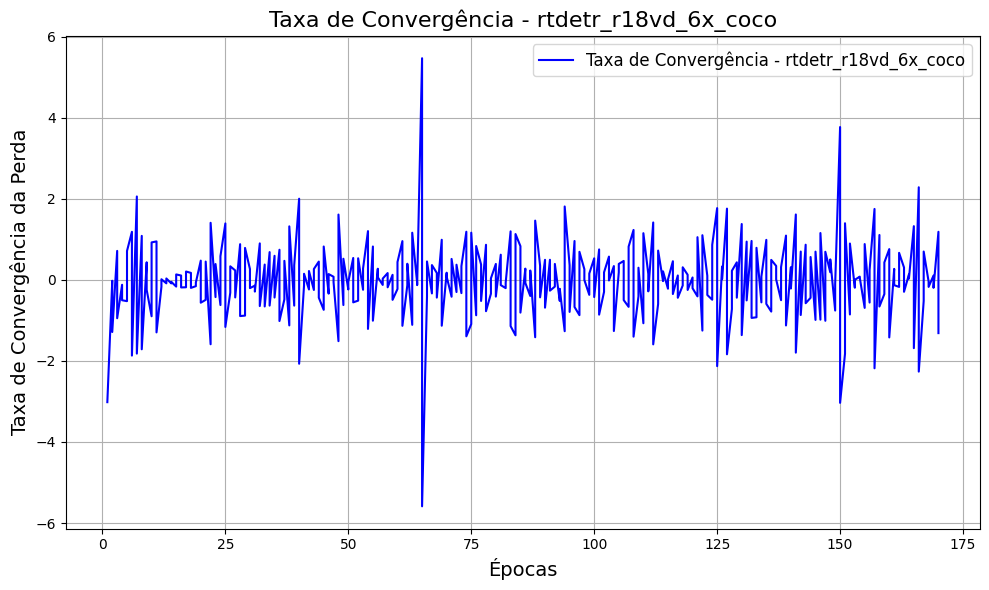

Média da Perda Final para o modelo rtdetr_r18vd_6x_coco: 9.2113


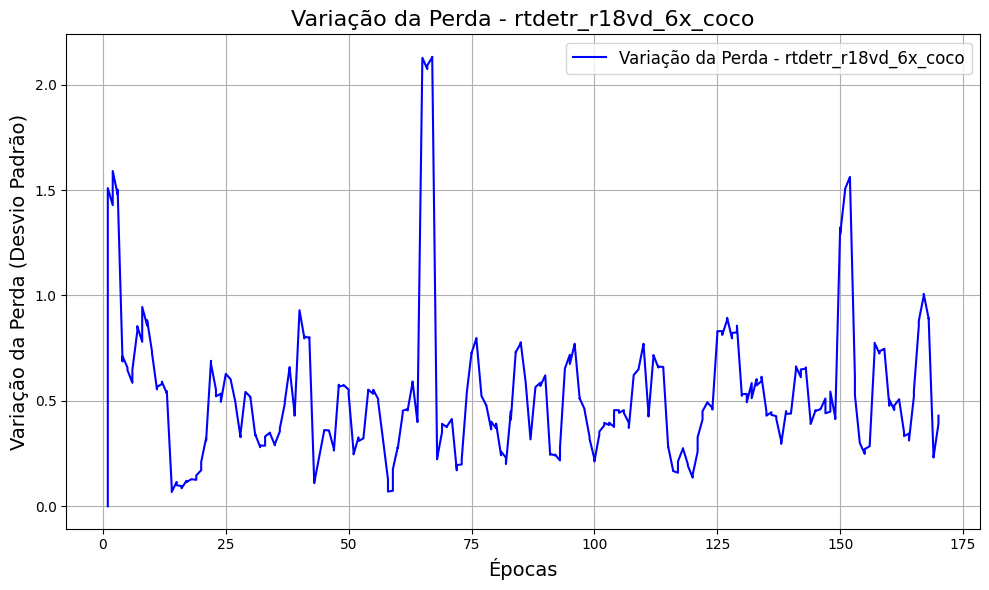

Épocas com as maiores quedas de perda para o modelo rtdetr_r18vd_6x_coco:
Época 65: queda de 5.5875
Época 150: queda de 3.0346
Época 1: queda de 3.0180
Época 166: queda de 2.2642
Época 157: queda de 2.1821


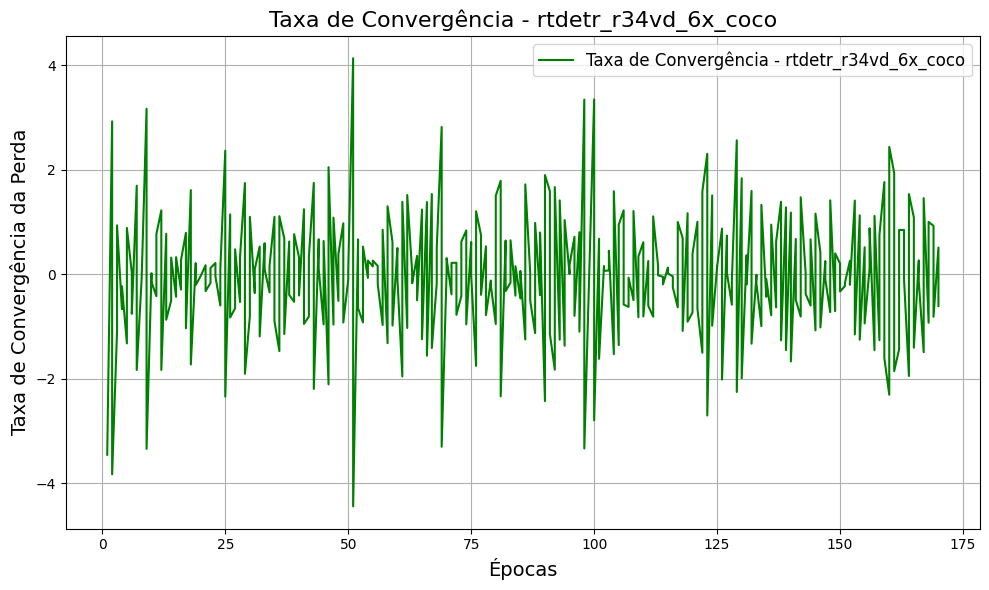

Média da Perda Final para o modelo rtdetr_r34vd_6x_coco: 11.2840


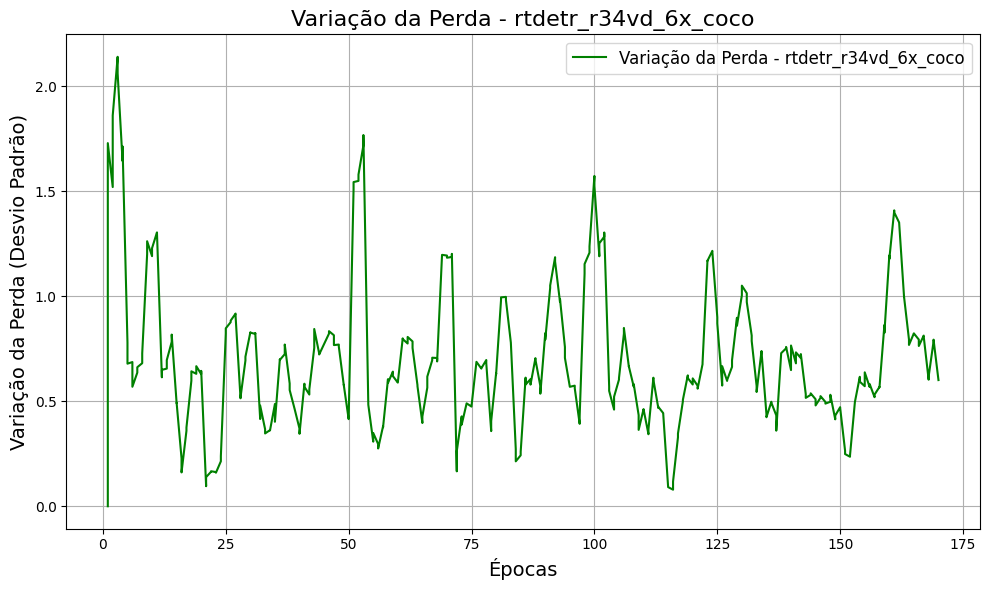

Épocas com as maiores quedas de perda para o modelo rtdetr_r34vd_6x_coco:
Época 51: queda de 4.4459
Época 2: queda de 3.8329
Época 1: queda de 3.4584
Época 9: queda de 3.3460
Época 98: queda de 3.3399


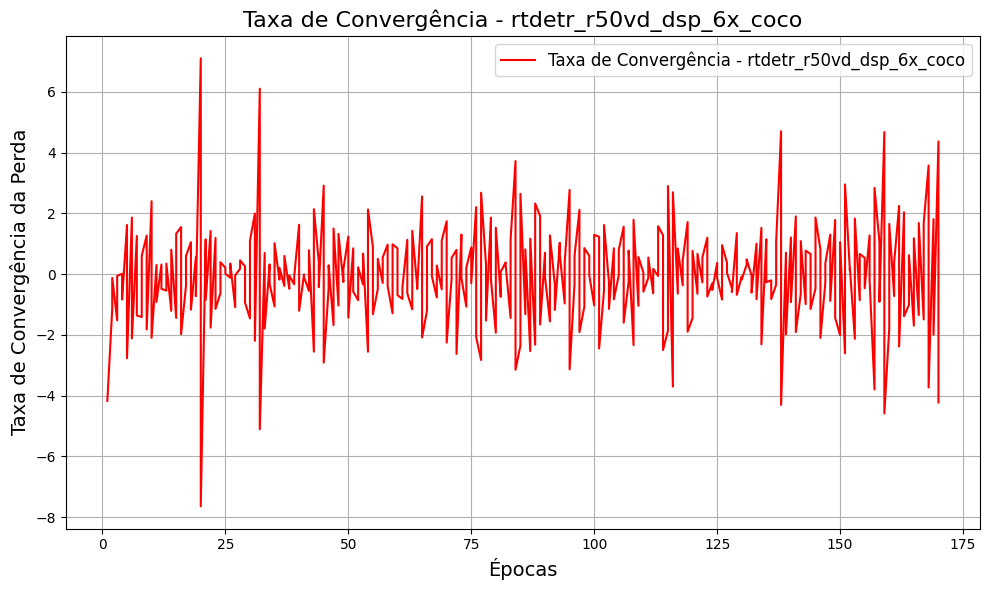

Média da Perda Final para o modelo rtdetr_r50vd_dsp_6x_coco: 13.9265


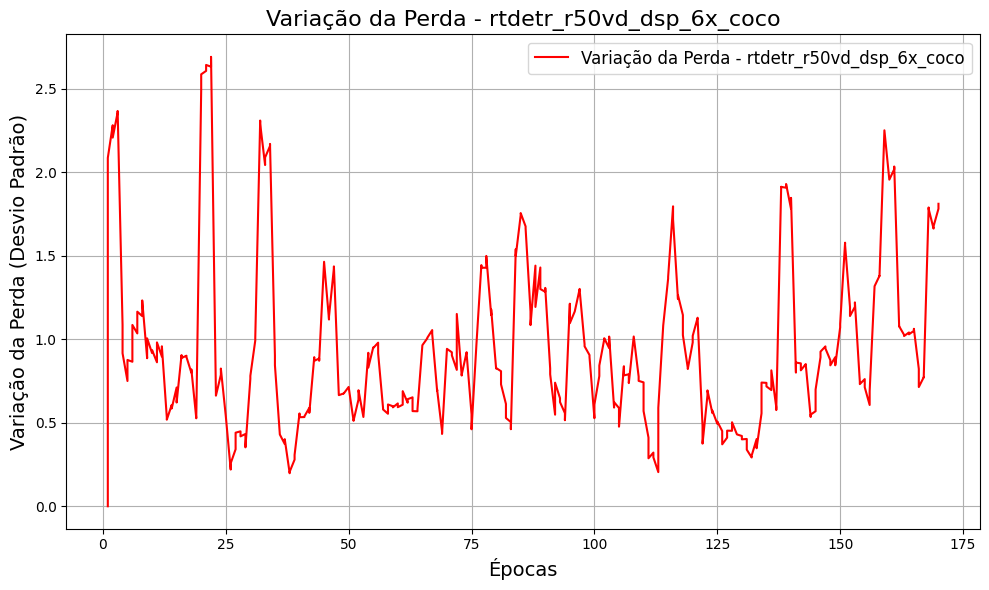

Épocas com as maiores quedas de perda para o modelo rtdetr_r50vd_dsp_6x_coco:
Época 20: queda de 7.6413
Época 32: queda de 5.1095
Época 159: queda de 4.5865
Época 138: queda de 4.3042
Época 170: queda de 4.2226


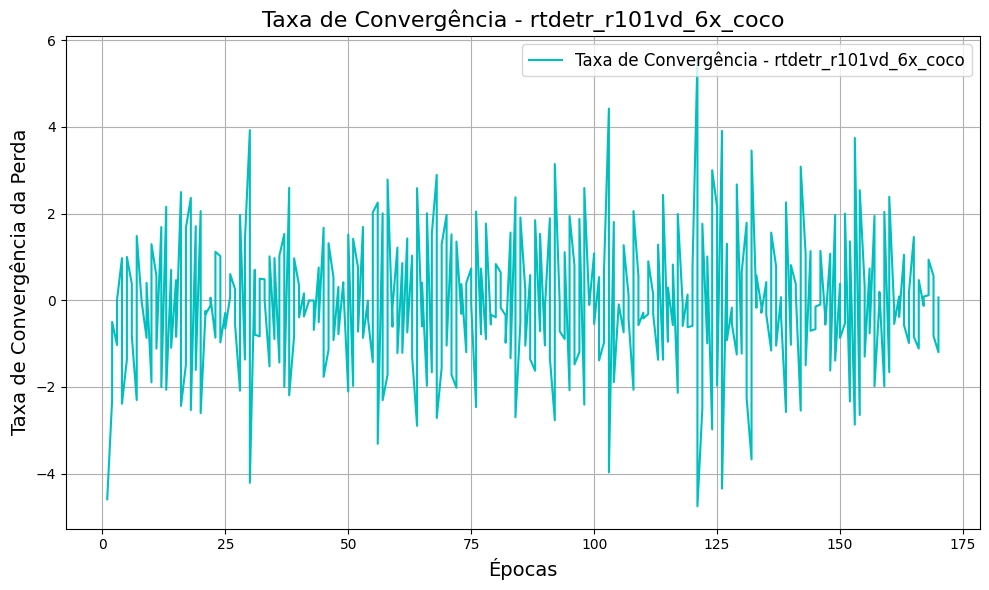

Média da Perda Final para o modelo rtdetr_r101vd_6x_coco: 12.7512


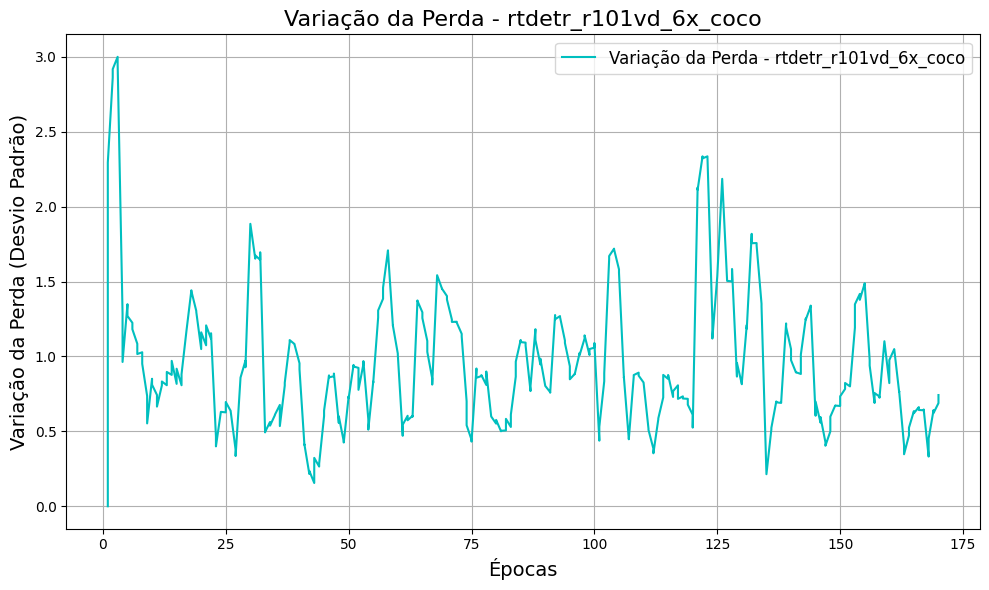

Épocas com as maiores quedas de perda para o modelo rtdetr_r101vd_6x_coco:
Época 121: queda de 4.7514
Época 1: queda de 4.5891
Época 126: queda de 4.3429
Época 30: queda de 4.2092
Época 103: queda de 3.9694


In [5]:
import numpy as np
import re
import matplotlib.pyplot as plt

# Função para processar cada arquivo de log e extrair épocas e perdas
def processar_arquivo(caminho_arquivo):
    epocas = []
    perdas = []
    
    # Regex para capturar os valores de época e perda média
    regex = r"Epoch: \[(\d+)\].*loss: ([\d\.]+)"
    
    with open(caminho_arquivo, "r") as arquivo:
        for linha in arquivo:
            match = re.search(regex, linha)
            if match:
                epoca = int(match.group(1)) + 1  # Converter de índice 0-based para 1-based
                perda = float(match.group(2))
                epocas.append(epoca)
                perdas.append(perda)
    
    return epocas, perdas

# Função para calcular a taxa de convergência da perda
def calcular_taxa_convergencia(epocas, perdas):
    taxas = [perdas[i] - perdas[i-1] for i in range(1, len(perdas))]
    return taxas

# Função para calcular a perda média final
def perda_media_final(perdas):
    return np.mean(perdas[-5:])  # Média das últimas 5 épocas

# Função para calcular a variação da perda por época (desvio padrão)
def calcular_variacao_perda(epocas, perdas):
    variacao = [np.std(perdas[max(0, i-5):i+1]) for i in range(len(perdas))]
    return variacao

# Função para identificar as épocas com as maiores quedas de perda
def identificar_quedas_mais_significativas(epocas, perdas, top_n=5):
    quedas = [(epocas[i], perdas[i-1] - perdas[i]) for i in range(1, len(perdas)) if perdas[i-1] > perdas[i]]
    quedas.sort(key=lambda x: x[1], reverse=True)
    return quedas[:top_n]

# Função para gerar os gráficos e análises
def gerar_analises(arquivos, nomes_modelos, max_epoca=170):
    cores = ['b', 'g', 'r', 'c']
    
    for i, caminho_arquivo in enumerate(arquivos):
        epocas, perdas = processar_arquivo(caminho_arquivo)
        
        # Filtrar até a época máxima
        epocas_limitadas = [epoca for epoca in epocas if epoca <= max_epoca]
        perdas_limitadas = [perdas[j] for j in range(len(epocas)) if epocas[j] <= max_epoca]
        
        modelo_nome = nomes_modelos[i]
        
        # 1. Taxa de Convergência da Perda
        taxas = calcular_taxa_convergencia(epocas_limitadas, perdas_limitadas)
        plt.figure(figsize=(10, 6))
        plt.plot(epocas_limitadas[1:], taxas, label=f'Taxa de Convergência - {modelo_nome}', color=cores[i])
        plt.xlabel('Épocas', fontsize=14)
        plt.ylabel('Taxa de Convergência da Perda', fontsize=14)
        plt.title(f'Taxa de Convergência - {modelo_nome}', fontsize=16)
        plt.grid(True)
        plt.legend(loc='upper right', fontsize=12)
        plt.tight_layout()
        plt.show()
        
        # 2. Comparação de Modelos (Perda Final)
        perda_final = perda_media_final(perdas_limitadas)
        print(f'Média da Perda Final para o modelo {modelo_nome}: {perda_final:.4f}')
        
        # 3. Variação da Perda por Época (Desvio Padrão)
        variacao = calcular_variacao_perda(epocas_limitadas, perdas_limitadas)
        plt.figure(figsize=(10, 6))
        plt.plot(epocas_limitadas, variacao, label=f'Variação da Perda - {modelo_nome}', color=cores[i])
        plt.xlabel('Épocas', fontsize=14)
        plt.ylabel('Variação da Perda (Desvio Padrão)', fontsize=14)
        plt.title(f'Variação da Perda - {modelo_nome}', fontsize=16)
        plt.grid(True)
        plt.legend(loc='upper right', fontsize=12)
        plt.tight_layout()
        plt.show()
        
        # 4. Identificação de Épocas Críticas (maiores quedas de perda)
        quedas_mais_significativas = identificar_quedas_mais_significativas(epocas_limitadas, perdas_limitadas)
        print(f'Épocas com as maiores quedas de perda para o modelo {modelo_nome}:')
        for epoca, queda in quedas_mais_significativas:
            print(f'Época {epoca}: queda de {queda:.4f}')
            
# Lista de arquivos e nomes dos modelos
arquivos = [
    r"D:\Projeto_MESTRADO\DÍBIO_RESULTADOS\rtdetr_r18vd_6x_coco\rtdetr_r18vd_6x_coco.txt",
    r"D:\Projeto_MESTRADO\DÍBIO_RESULTADOS\rtdetr_r34vd_6x_coco\rtdetr_r34vd_6x_coco.txt",
    r"D:\Projeto_MESTRADO\DÍBIO_RESULTADOS\rtdetr_r50vd_dsp_6x_coco\Projeto_FINAL_r50vd_dsp_6x_coco.yml.(deucerto)ipynb.txt",
    r"D:\Projeto_MESTRADO\DÍBIO_RESULTADOS\rtdetr_r101vd_6x_coco\rtdetr_r101vd_6x_coco.txt"
]

# Nomes dos modelos para as legendas
nomes_modelos = [
    'rtdetr_r18vd_6x_coco',
    'rtdetr_r34vd_6x_coco',
    'rtdetr_r50vd_dsp_6x_coco',
    'rtdetr_r101vd_6x_coco'
]

# Gerar as análises
gerar_analises(arquivos, nomes_modelos, max_epoca=170)
